In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from scipy.sparse.linalg import eigs
from utils import load_data, svd, plot_analysis, bootstrapping
from JDA import JDA1
from mpl_toolkits import mplot3d
from random import sample

%load_ext autoreload
%autoreload 2

In [70]:
# ground truth: (EI10 + UN)_M1_LHs
S1, T1 = load_data(source_beam='A', target_beam = 'B', damage_levels = [0, 1], loc=1)
ST1 = pd.concat([S1, T1], ignore_index=True)

Getting the healthy list...
Getting the EI 10 list...
Getting the healthy list...
Getting the EI 10 list...


In [71]:
X_train, X_test, y_train, y_test = train_test_split(T1.loc[:, "d1":"d9"], T1['class'], test_size=0.25, random_state=0)

In [ ]:
# best performing models after manual fine-tuning, for damage level 10% 30% 50% 70% 90% at locations 1, 3, 5, 7
# loc3
# jda = JDA1(n_iter=10, mu=1, gamma =1, top_k=2, neighbors=30, print_final = True, print=True)
# jda = JDA1(n_iter=20, mu=20, gamma =10, top_k=8, neighbors=30, print_final = True, print=True)
# jda = JDA1(n_iter=10, mu=25, gamma =18, top_k=9, neighbors=30, print_final = True, print=True) 
# jda = JDA1(n_iter=10, mu=13, gamma =10, top_k=7, neighbors=30, print_final = True, print=True) 
# jda = JDA1(n_iter=10, mu=10, gamma =10, top_k=9, neighbors=30, print_final = True, print=True) 
# loc5
# jda = JDA1(n_iter=10, mu=1, gamma =1, top_k=2, neighbors=30, print_final = True, print=True) #ei 10
# jda = JDA1(n_iter=10, mu=1, gamma =0.5, top_k=2, neighbors=30, print_final = True, print=True)
# jda = JDA1(n_iter=10, mu=1, gamma =1, top_k=2, neighbors=30, print_final = True, print=True)
# jda = JDA1(n_iter=10, mu=1, gamma =0.5, top_k=3, neighbors=30, print_final = True, print=True)
# jda = JDA1(n_iter=10, mu=1, gamma =1, top_k=2, neighbors=30, print_final = True, print=True) # ei 90
# # loc7
# jda = JDA1(n_iter=10, mu=10, gamma =10, top_k=3, neighbors=30, print_final = True, print=True)
# jda = JDA1(n_iter=10, mu=10, gamma =5, top_k=3, neighbors=30, print_final = True, print=True)
# jda = JDA1(n_iter=10, mu=1, gamma =1, top_k=4, neighbors=30, print_final = True, print=True)
# jda = JDA1(n_iter=10, mu=1, gamma =1, top_k=4, neighbors=30, print_final = True, print=True) # ei = 70
# jda = JDA1(n_iter=10, mu=1, gamma =5, top_k=7, neighbors=30, print_final = True, print=True)
# loc 1
# jda = JDA1(n_iter=10, mu=26, gamma =0.42, top_k=2, neighbors=30, print_final = True, print=True)
# jda = JDA1(n_iter=10, mu=36.8, gamma =10, top_k=9, neighbors=30, print_final = True, print=False)
# jda = JDA1(n_iter=10, mu=10, gamma =18, top_k=9, neighbors=30, print_final = True, print=True)
# jda = JDA1(n_iter=10, mu=30, gamma =20, top_k=8, neighbors=30, print_final = True, print=True)  
# jda = JDA1(n_iter=10, mu=50, gamma =30, top_k=9, neighbors=30, print_final = True, print=True)
jda.fit(S1.loc[:, "d1":"d9"], S1['class'], X_train, y_train)
test_pred, test_score = jda.predict(X_test, y_test)
print("Test accuracy: ", test_score)
cm = confusion_matrix(y_test, test_pred)
tn, fp, fn, tp = cm.ravel()
print("True pos: ", tp, "False pos: ", fp, "\nTrue neg:", tn, "False neg: ", fn, "\n")

In [ ]:
# experiment 4
from utils import bootstrapping
# list_acc_5 = []
# list_recall0_5 = []
# list_recall1_5 = []
# list_acc_7 = []
# list_recall0_7 = []
# list_recall1_7 = []
list_acc_1 = []
list_recall0_1 = []
list_recall1_1 = []
# list_acc_3 = []
# list_recall0_3 = []
# list_recall1_3 = []
list_perc = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
X_train0 = X_train[y_train == 0]
X_train1 = X_train[y_train == 1]
for f in list_perc:
    X_train1_train = X_train1.iloc[:int(len(X_train1) * f),:]
    y_train1_train = y_train[X_train1_train.index]
    X_train_new = pd.concat([X_train0, X_train1_train])
    y_train_new = y_train[X_train_new.index]
    jda = JDA1(n_iter=10, mu=26, gamma =0.42, top_k=2, neighbors=30, print_final = True, print=False) # loc1
    # jda = JDA1(n_iter=10, mu=1, gamma =1, top_k=2, neighbors=30, print_final = True, print=False) # loc 3
    # jda = JDA1(n_iter=10, mu=1, gamma =1, top_k=2, neighbors=30, print_final = True, print=False) #loc5
    # jda = JDA1(n_iter=10, mu=10, gamma =10, top_k=3, neighbors=30, print_final = True, print=False) #loc7
    jda.fit(S1.loc[:, "d1":"d9"], S1['class'], X_train_new, y_train_new)
    acc, recall0, recall1 = bootstrapping(jda, X_test, y_test)
    list_acc_1.append(acc)
    list_recall0_1.append(recall0)
    list_recall1_1.append(recall1)

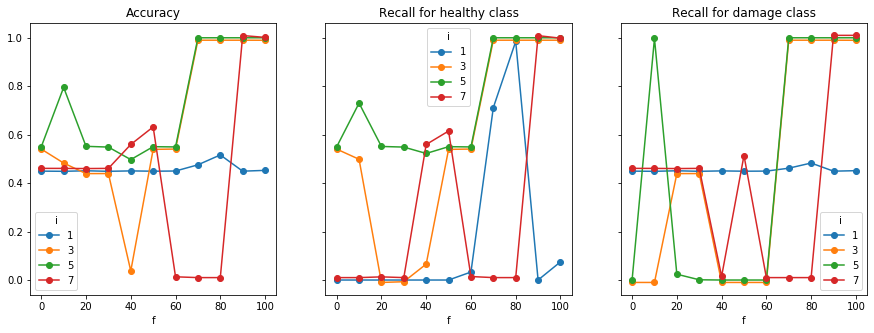

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey = True)
axes[0].plot(list_perc, list_acc_1, marker='o', label='1')
axes[0].plot(list_perc, np.array(list_acc_3)-0.01, marker='o', label='3')
axes[0].plot(list_perc, list_acc_5, marker='o', label='5')
axes[0].plot(list_perc, np.array(list_acc_7)+0.01, marker='o', label='7')
axes[0].set_xlabel('f')
axes[0].set_xticklabels([0, 0 ,20, 40, 60, 80, 100])
axes[0].set_title('Accuracy')
axes[0].legend(title='i')

axes[1].plot(list_perc, list_recall0_1, marker='o', label='1')
axes[1].plot(list_perc, np.array(list_recall0_3)-0.01, marker='o', label='3')
axes[1].plot(list_perc, list_recall0_5, marker='o', label='5')
axes[1].plot(list_perc, np.array(list_recall0_7)+0.01, marker='o', label='7')
axes[1].set_xlabel('f')
axes[1].set_xticklabels([0, 0 ,20, 40, 60, 80, 100])
axes[1].set_title('Recall for healthy class')
axes[1].legend(title='i')

axes[2].plot(list_perc, list_recall1_1, marker='o', label='1')
axes[2].plot(list_perc, np.array(list_recall1_3)-0.01, marker='o', label='3')
axes[2].plot(list_perc, list_recall1_5, marker='o', label='5')
axes[2].plot(list_perc, np.array(list_recall1_7)+0.01, marker='o', label='7')
axes[2].set_xlabel('f')
axes[2].set_xticklabels([0, 0 ,20, 40, 60, 80, 100])
axes[2].set_title('Recall for damage class')
axes[2].legend(title='i')

In [46]:
list_acc = []
list_acc_train = []
# list_recall0 = []
# list_recall1 = []
for i in range(1000):
    sample_X = X_test.sample(n=500, replace=True)
    sample_y = y_test[sample_X.index]
    pred, sc = jda.predict(sample_X, sample_y)
    list_acc.append(sc)
    # tn, fp, fn, tp = confusion_matrix(sample_y, pred).ravel()
    
    # if fn == tn == 0:
    #     list_recall0.append(0)
    # else:
    #     list_recall0.append(tn/(tn + fn))

    # if tp == fp == 0:
    #     list_recall1.append(0)
    # else:
    #     list_recall1.append(tp/(tp + fp))

    sample_X_train = X_train.sample(n=500, replace=True)
    sample_y_train = y_train[sample_X_train.index]
    _, sc_train = jda.predict(sample_X_train, sample_y_train)
    list_acc_train.append(sc_train)

In [47]:
# print(np.mean(list_recall1))
# print(np.std(list_recall1))
# print(np.mean(list_recall0))
# print(np.std(list_recall0))

print(np.mean(list_acc))
print(np.std(list_acc))
print(np.mean(list_acc_train))
print(np.std(list_acc_train))

0.723352
0.022855985999295683
0.754636
0.01888606639827364


In [10]:
# inject noise to target
def inject_noise(dim_to_apply, eps, k = 1000):
    ncol = len(dim_to_apply)
    # generate a single epsilon value
    noise = np.array(random.choices([-1, 1], k=k))
    noise = noise.reshape((-1, ncol))
    
    assert(noise.shape == (1000, ncol))
    
    un_list = []
    dm_list = []

    # read in ground truth from target (beam B)
    for i in range(1, 201):
        filename_un = "Data/Beam_B_M1/Acceleration/UN/UN.Accel_EI100_M1_LH" + str(i) + ".txt"
        filename_dm = "Data/Beam_B_M1/Acceleration/D1/D1.Accel_EI10_M1_LH" + str(i) + ".txt"
        
        sample_un = pd.read_csv(filename_un, header=None, sep=' ', prefix='node_')
        sample_dm = pd.read_csv(filename_dm, header=None, sep=' ', prefix='node_')

        # apply noise on 1 dimension
        sample_un.iloc[:, dim_to_apply] = sample_un.iloc[:, dim_to_apply] + eps * noise
        sample_dm.iloc[:, dim_to_apply] = sample_dm.iloc[:, dim_to_apply] + eps * noise

        # svd
        sample_un_post_svd = svd(sample_un, 0) 
        sample_dm_post_svd = svd(sample_dm, 1) # damage class

        un_list.append(sample_un_post_svd)
        dm_list.append(sample_dm_post_svd)
    
    un = pd.concat(un_list, ignore_index=True)
    dm = pd.concat(dm_list, ignore_index=True)
    return pd.concat([un, dm], ignore_index=True)

## Multi-damage level transfer

In [3]:
S, T = load_data(source_beam='A', target_beam = 'B', damage_levels = [0, 1, 3, 5, 7, 9], loc=5)
ST = pd.concat([S, T], ignore_index=True)
X_train, X_test, y_train, y_test = train_test_split(T.loc[:, "d1":"d9"], T['class'], test_size=0.25, random_state=0)

Getting the healthy list...
Getting the EI 10 list...
Getting the EI 30 list...
Getting the EI 50 list...
Getting the EI 70 list...
Getting the EI 90 list...
Getting the healthy list...
Getting the EI 10 list...
Getting the EI 30 list...
Getting the EI 50 list...
Getting the EI 70 list...
Getting the EI 90 list...


In [46]:
# S, T = load_data(source_beam='A', target_beam = 'B', damage_levels = [0, 1, 3, 5, 7, 9], loc=5)
ST = pd.concat([S, T], ignore_index=True)
X_train, X_test, y_train, y_test = train_test_split(T.loc[:, "d1":"d9"], T['class'], test_size=0.25, random_state=0)
jda = JDA1(n_iter=10, mu=1, gamma =10, top_k=9, neighbors=30, print_final = True, print=True)
# jda = JDA1(n_iter=10, mu=1e-10, gamma =1e-4, top_k=9, neighbors=30, print_final = True, print=True)
jda.fit(S.loc[:, "d1":"d9"], S['class'], X_train, y_train)
preds, test_score = jda.predict(X_test, y_test)
print("Test accuracy: ", test_score)
cm = confusion_matrix(y_test, preds)
tn, fp, fn, tp = cm.ravel()
print("True pos: ", tp, "False pos: ", fp, "\nTrue neg: ", tn, "False neg: ", fn, "\n")

[1/10] Accuracy: 0.8267
[2/10] Accuracy: 0.8267
[3/10] Accuracy: 0.8267
[4/10] Accuracy: 0.8267
[5/10] Accuracy: 0.8267
[6/10] Accuracy: 0.8267
[7/10] Accuracy: 0.8267
[8/10] Accuracy: 0.8267
[9/10] Accuracy: 0.8267
[10/10] Accuracy: 0.8267
Final accuracy:  0.8266666666666667
Test accuracy:  0.8533333333333334
True pos:  256 False pos:  44 
True neg:  0 False neg:  0 



In [ ]:
# ground truth: (EI10 + UN)_M1_LHs
S, T = load_data(source_beam='A', target_beam = 'C', damage_levels = [0, 1, 3, 5, 7, 9], loc=5)
ST = pd.concat([S, T], ignore_index=True)
X_train, X_test, y_train, y_test = train_test_split(T.loc[:, "d1":"d9"], T['class'], test_size=0.25, random_state=0)
list_gamma = list(np.linspace(0.001, 100, 20))
# list_gamma = list(np.linspace(1, 20, 20))
# list_k = [2, 3, 4, 5, 6, 7, 8, 9]
# list_mu = list(np.linspace(0.001, 100, 20))
list_fp = []
list_fn = []
list_acc_train = []
list_acc_test = []
# for k in list_k:
for g in list_gamma:
# for m in list_mu:
    # jda = JDA1(n_iter=10, mu=m, gamma =1, top_k=5, neighbors=30, print_final = True, print=False)
    jda = JDA1(n_iter=10, mu=10, gamma =g, top_k=5, neighbors=30, print_final = True, print=False)
    # jda = JDA1(n_iter=10, mu=10, gamma =40, top_k=k, neighbors=30, print_final = False, print=False)
    jda.fit(S.loc[:, "d1":"d9"], S['class'], X_train, y_train)
    test_score = jda.predict(X_test, y_test)
    
    list_acc_train.append(jda.final_acc)
    list_acc_test.append(test_score)
    
    cm = confusion_matrix(y_test, jda.predict(X_test))
    tn, fp, fn, tp = cm.ravel()

    list_fp.append(fp)
    list_fn.append(fn)
    print("True pos: ", tp, "False pos: ", fp, "True neg: ", tn, "False neg: ", fn, "\n")

## Hyperparameter tuning experiment (deprecated)

This experiment is not completed. JDA yields very random trends as we tune the parameters, there are no clear linear trend/spike as we increase the values of the hyper-parameters. There is currently no explanation yet as to why this is the case. A more systematic way to grid search the parameter space, or analyzing this behavior on an algorithmic level will help improve the current model and/or navigate for a better-performing model.

In [ ]:
## parameter sensitivity
list_mu = list(np.logspace(0.001, 100, 20))
# list_mu = list(np.logspace(-3, 2, 20))
# list_gamma = list(np.linspace(0.001, 100, 20))
list_gamma = list(np.logspace(-3, 2, 20))
list_k = [2, 3, 4, 5, 6, 7, 8, 9]
listm_recall0_train = []
listm_recall0_test = []
listm_recall1_train = []
listm_recall1_test = []
listm_acc_train = []
listm_acc_test = []
# for k in list_k:
for g in list_gamma:
# for m in list_mu:
    jda = JDA1(n_iter=10, mu=100, gamma =g, top_k=9, neighbors=30, print_final = True, print=False)
    jda.fit(S1.loc[:, "d1":"d9"], S1['class'], X_train, y_train)
    acc_train, recall0_train, recall1_train = bootstrapping(jda, X_train, y_train)
    acc_test, recall0_test, recall1_test = bootstrapping(jda, X_test, y_test)

    listm_acc_train.append(acc_train)
    listm_recall0_train.append(recall0_train)
    listm_recall1_train.append(recall1_train)
    
    listm_acc_test.append(acc_test)
    listm_recall0_test.append(recall0_test)
    listm_recall1_test.append(recall1_test)

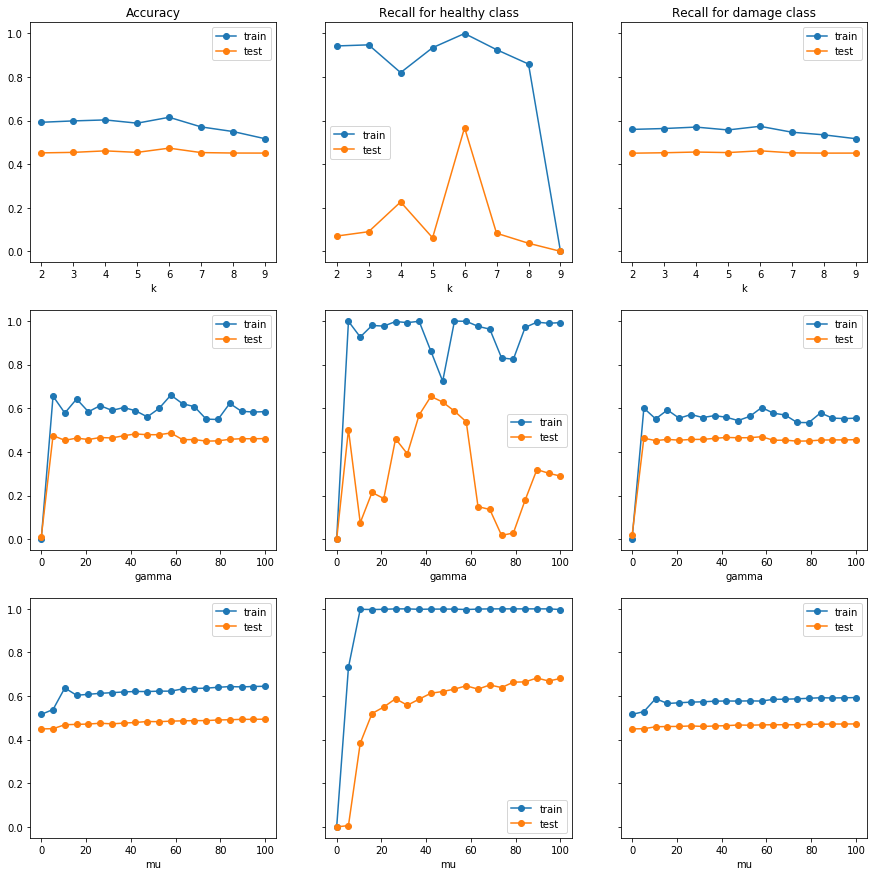

In [35]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=True)
axes[0][0].plot(list_k, listk_acc_train, label='train', marker='o')
axes[0][0].plot(list_k, listk_acc_test, label='test', marker='o')
axes[0][0].set_xlabel('k')
axes[0][0].set_title('Accuracy')
axes[0][0].legend()

axes[0][1].plot(list_k, listk_recall0_train, label='train', marker='o')
axes[0][1].plot(list_k, listk_recall0_test, label='test', marker='o')
axes[0][1].set_xlabel('k')
axes[0][1].set_title('Recall for healthy class')
axes[0][1].legend()

axes[0][2].plot(list_k, listk_recall1_train, label='train', marker='o')
axes[0][2].plot(list_k, listk_recall1_test, label='test', marker='o')
axes[0][2].set_xlabel('k')
axes[0][2].set_title('Recall for damage class')
axes[0][2].legend()

axes[1][0].plot(list_gamma, listg_acc_train, label='train', marker='o')
axes[1][0].plot(list_gamma, listg_acc_test, label='test', marker='o')
axes[1][0].set_xlabel('gamma')
axes[1][0].legend()

axes[1][1].plot(list_gamma, listg_recall0_train, label='train', marker='o')
axes[1][1].plot(list_gamma, listg_recall0_test, label='test', marker='o')
axes[1][1].set_xlabel('gamma')
axes[1][1].legend()

axes[1][2].plot(list_gamma, listg_recall1_train, label='train', marker='o')
axes[1][2].plot(list_gamma, listg_recall1_test, label='test', marker='o')
axes[1][2].set_xlabel('gamma')
axes[1][2].legend()

axes[2][0].plot(list_mu, listm_acc_train, label='train', marker='o')
axes[2][0].plot(list_mu, listm_acc_test, label='test', marker='o')
axes[2][0].set_xlabel('mu')
axes[2][0].legend()

axes[2][1].plot(list_mu, listm_recall0_train, label='train', marker='o')
axes[2][1].plot(list_mu, listm_recall0_test, label='test', marker='o')
axes[2][1].set_xlabel('mu')
axes[2][1].legend()

axes[2][2].plot(list_mu, listm_recall1_train, label='train', marker='o')
axes[2][2].plot(list_mu, listm_recall1_test, label='test', marker='o')
axes[2][2].set_xlabel('mu')
axes[2][2].legend()